Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [3]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [6]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다

In [7]:
subscription_key = '843be375354149bea754cdf0b500f946'
vision_base_url = 'https://labuser12computervision.cognitiveservices.azure.com/vision/v2.0/'

In [8]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인 합니다.

In [37]:
image_url = 'https://image.kmib.co.kr/online_image/2018/1225/611211110012944746_1.jpg'

In [38]:
con = requests.get(image_url).content #con 변수에 content의 바이너리가 저장
byte = BytesIO(con) #바이너리를 이미지형태로 볼 수 있게 저장
image = Image.open(byte)

# image = Image.open(ByteIO(requests.get(image_url).contents)) -> 한줄로도 작성 가능

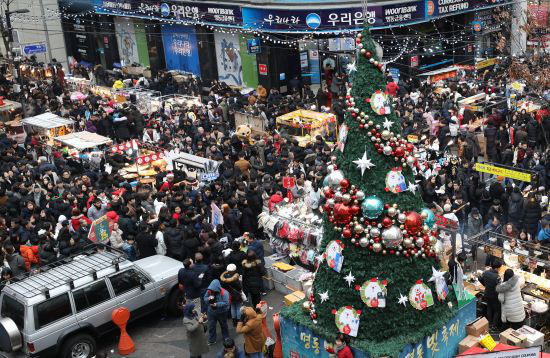

In [39]:
image

In [40]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params  = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [41]:
response  = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

In [42]:
result = response.json()

In [43]:
result

{'categories': [{'name': 'people_crowd', 'score': 0.9765625}],
 'color': {'dominantColorForeground': 'Black',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Black', 'Grey'],
  'accentColor': '8C733F',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['road',
   'person',
   'toy',
   'car',
   'street',
   'large',
   'city',
   'truck',
   'traffic',
   'man',
   'people',
   'driving',
   'filled',
   'crowd',
   'many',
   'parked',
   'busy',
   'group',
   'crowded',
   'holding',
   'riding',
   'standing',
   'motorcycle'],
  'captions': [{'text': 'a close up of a toy car in front of a crowd',
    'confidence': 0.6899457498773627}]},
 'requestId': '68de420c-ef59-431a-b101-a30266463ac5',
 'metadata': {'height': 358, 'width': 550, 'format': 'Jpeg'}}

In [48]:
image_captions = result['description']['captions'][0]['text']

In [49]:
image_captions

'a close up of a toy car in front of a crowd'

Object Detection

In [50]:
objectDetection_url = vision_base_url + 'detect'

In [139]:
image_url = 'https://pip-thumb.zumst.com/api/v1/tafdj_VC002_65722876_content.jpeg?w=880&h=495'

In [140]:
image = Image.open(BytesIO(requests.get(image_url).content))

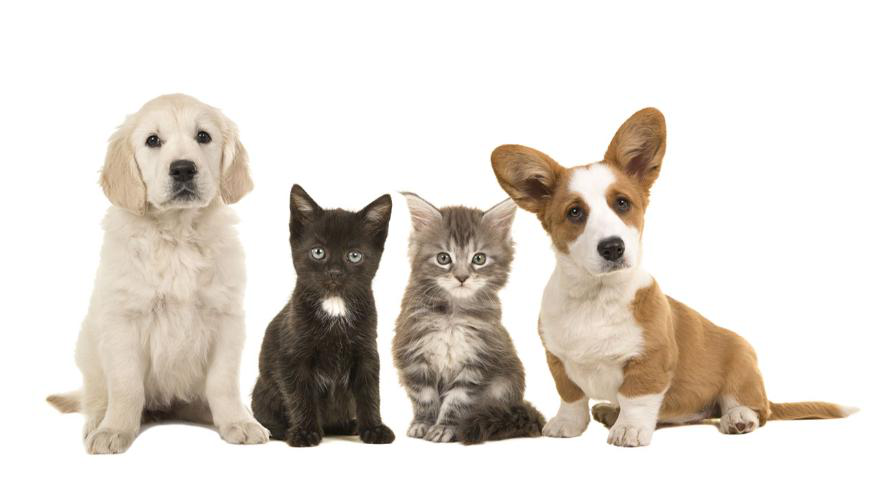

In [141]:
image

In [142]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params  = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [143]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)

In [144]:
result = response.json()

In [145]:
result

{'objects': [{'rectangle': {'x': 55, 'y': 83, 'w': 207, 'h': 385},
   'object': 'golden retriever',
   'confidence': 0.515,
   'parent': {'object': 'retriever',
    'confidence': 0.665,
    'parent': {'object': 'dog',
     'confidence': 0.874,
     'parent': {'object': 'mammal',
      'confidence': 0.911,
      'parent': {'object': 'animal', 'confidence': 0.912}}}}},
  {'rectangle': {'x': 388, 'y': 191, 'w': 144, 'h': 250},
   'object': 'sand cat',
   'confidence': 0.551,
   'parent': {'object': 'cat',
    'confidence': 0.804,
    'parent': {'object': 'mammal',
     'confidence': 0.821,
     'parent': {'object': 'animal', 'confidence': 0.821}}}},
  {'rectangle': {'x': 249, 'y': 196, 'w': 143, 'h': 257},
   'object': 'cat',
   'confidence': 0.782,
   'parent': {'object': 'mammal',
    'confidence': 0.83,
    'parent': {'object': 'animal', 'confidence': 0.831}}},
  {'rectangle': {'x': 506, 'y': 124, 'w': 372, 'h': 324},
   'object': 'dog',
   'confidence': 0.831,
   'parent': {'object': 

In [146]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image) #그리기 모드

In [147]:
# boundingBox를 위한 함수 작성

def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects:
    #print(obj)

    rect = obj['rectangle']
    #print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')

    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')

In [148]:
DrawBox(result)

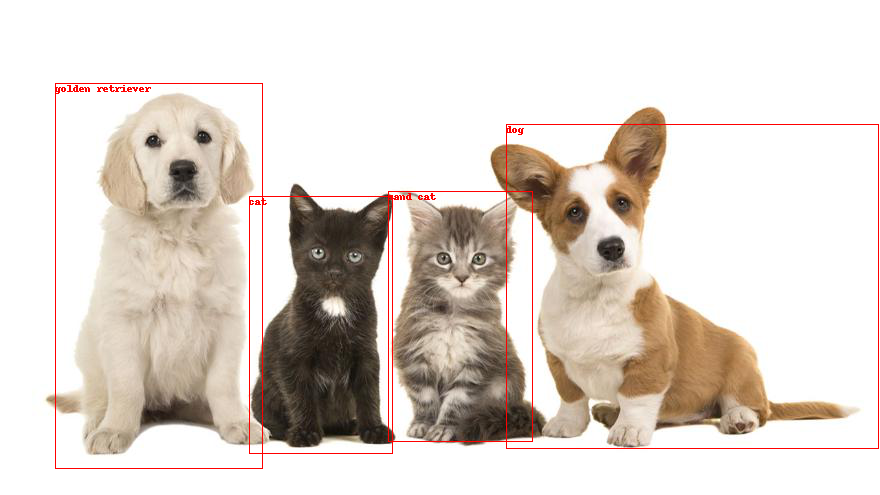

In [149]:
image